C:/Users/20115/Desktop/newdataset/train\Covid


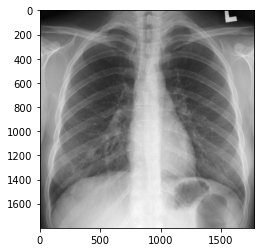

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm


DATADIR = "C:/Users/20115/Desktop/newdataset/train"
CATEGORIES = ["Covid","normal","phenomina"]

for cat in CATEGORIES:
    path = os.path.join(DATADIR,cat)
    print(path)
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array ,cmap="gray")
        plt.show()
        break
    break
            

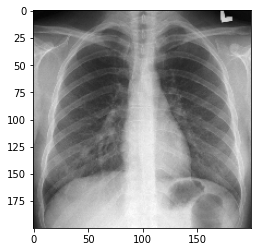

In [4]:
IMG_SIZE = 200

new_array = cv2.resize(img_array ,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array ,cmap="gray")

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))
    

100%|██████████| 330/330 [00:01<00:00, 229.61it/s]

966


In [36]:
TEST_DIR ="C:/Users/20115/Desktop/newdataset/validation/"
test_data = []

def create_test_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(TEST_DIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

100%|██████████| 62/62 [00:00<00:00, 122.13it/s]

178


In [73]:
X_test = []
y_test = []

for f,l in test_data:
    X_test.append(f)
    y_test.append(l)



X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test =np.array(y_test)

In [74]:
import random

random.shuffle(test_data)

In [75]:
for sample in test_data[1:10]:
    print(sample[1])

2
0
0
0
1
0
1
2
1


In [125]:
print(len(training_data))

966


In [126]:
import random

random.shuffle(training_data)

In [127]:
for sample in training_data[1:10]:
    print(sample[1])

1
0
1
1
1
1
2
0
1


In [128]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)



X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)


In [129]:
import pickle

pickle_out = open("X1.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [130]:
X[1]

array([[[31],
        [37],
        [41],
        ...,
        [60],
        [53],
        [50]],

       [[33],
        [32],
        [40],
        ...,
        [55],
        [54],
        [42]],

       [[33],
        [31],
        [41],
        ...,
        [58],
        [50],
        [47]],

       ...,

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [ 0]],

       [[ 0],
        [ 0],
        [ 0],
        ...,
        [ 0],
        [ 0],
        [ 0]]], dtype=uint8)

In [112]:
X_test[1]

array([[[1.28369322e-16],
        [9.98428058e-17],
        [2.28212127e-16],
        ...,
        [3.56581449e-16],
        [3.99371223e-16],
        [2.85265159e-16]],

       [[9.98428058e-17],
        [1.42632580e-16],
        [2.56738643e-16],
        ...,
        [3.13791675e-16],
        [3.70844707e-16],
        [3.99371223e-16]],

       [[7.13162898e-17],
        [1.99685612e-16],
        [3.70844707e-16],
        ...,
        [3.99371223e-16],
        [4.42160997e-16],
        [5.56267061e-16]],

       ...,

       [[3.13791675e-16],
        [3.13791675e-16],
        [2.99528417e-16],
        ...,
        [2.38196408e-15],
        [2.73854553e-15],
        [2.99528417e-15]],

       [[3.13791675e-16],
        [3.13791675e-16],
        [2.99528417e-16],
        ...,
        [2.39622734e-15],
        [2.73854553e-15],
        [3.05233720e-15]],

       [[3.13791675e-16],
        [3.13791675e-16],
        [2.99528417e-16],
        ...,
        [2.49607014e-15],
        [2.7528

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical

pickle_in = open("X1.pickle","rb")
X = pickle.load(pickle_in)
pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)
from tensorflow.keras.utils import to_categorical

X = X/255.0
X_test=X_test/255.0


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=X.shape[1:]))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu', input_dim=8))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3 , activation='softmax'))

optimizer='Adam'
loss='categorical_crossentropy'
metrics=['accuracy']



model.compile(optimizer, loss=loss, metrics=metrics)


history=model.fit(
  X,
  to_categorical(y),
  epochs=3,
  validation_split=0.3)


print(model.summary())
model.save('choosen2.model')


Train on 676 samples, validate on 290 samples
Epoch 1/3
676/676 [==============================] - 79s 117ms/sample - loss: 0.9550 - accuracy: 0.4763 - val_loss: 0.5533 - val_accuracy: 0.7690
Epoch 2/3
676/676 [==============================] - 98s 145ms/sample - loss: 0.4898 - accuracy: 0.8136 - val_loss: 0.3879 - val_accuracy: 0.8724
Epoch 3/3
676/676 [==============================] - 97s 144ms/sample - loss: 0.3815 - accuracy: 0.8595 - val_loss: 0.2716 - val_accuracy: 0.9034
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_345 (Conv2D)          (None, 200, 200, 32)      320       
_________________________________________________________________
conv2d_346 (Conv2D)          (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_175 (MaxPoolin (None, 100, 100, 32)      0         
_______________________________

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
s = np.arange(X.shape[0])
np.random.shuffle(s)
X_train = X[s]
Y_train = y[s]

x_train, x_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=11
)

1
0
1
1
1
1
2
0
1
2
1
1


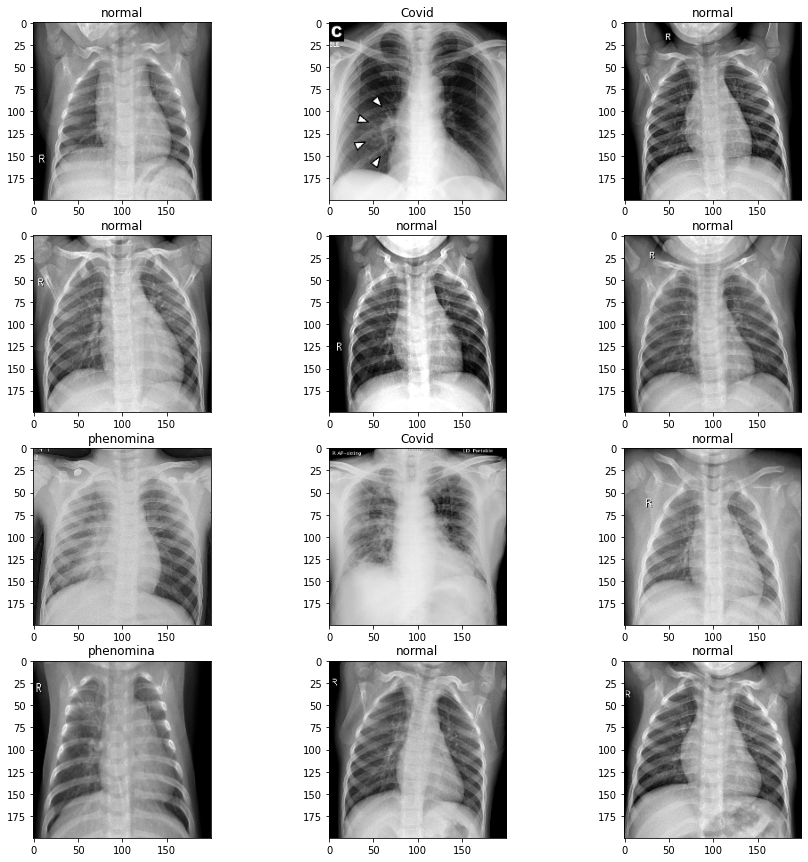

In [140]:
# # Display first 15 images of moles, and how they are classified
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
X=X.squeeze()
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(columns, rows, i)
    if y[i] == 0:
        ax.title.set_text('Covid')
        plt.imshow(X[i], cmap="gray")
        print(y[i])
    elif y[i] == 1 :
        ax.title.set_text('normal')
        plt.imshow(X[i], cmap="gray")
        print(y[i])
    else :
        ax.title.set_text('phenomina')
        plt.imshow(X[i], cmap="gray")
        print(y[i])
    
plt.show()


In [151]:
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
CATEGORIES = ["Covid", "normal","phenumina"]
pred =[]
test=[]
def prepare(filepath):
    IMG_SIZE = 200  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0


model = tf.keras.models.load_model("choosen2.model")
C:\Users\20115\Desktop\newdataset\test
prediction1 = model.predict([prepare('C:/Users/20115/h1.jpeg')])
prediction2 = model.predict([prepare('C:/Users/20115/xray.png')])
prediction3 = model.predict([prepare('C:/Users/20115/norm.jpeg')])
prediction4 = model.predict([prepare('C:/Users/20115/hamada.png')])
prediction5 = model.predict([prepare('C:/Users/20115/sick1.png')])
prediction6 = model.predict([prepare('C:/Users/20115/normal1.jpeg')])

test1 =CATEGORIES[int(prediction1[0][0])]
test2 =CATEGORIES[int(prediction2[0][0])]
test3 =CATEGORIES[int(prediction3[0][0])]
test4 =CATEGORIES[int(prediction4[0][0])]
test5 =CATEGORIES[int(prediction5[0][0])]
test6 =CATEGORIES[int(prediction6[0][0])]
print(CATEGORIES[int(prediction1[0][0])])

Covid


In [251]:
import cv2
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import gc
CATEGORIES = ["Covid", "normal","phenumina"]
test='C:/Users/20115/Desktop/newdataset/test'
model = tf.keras.models.load_model("choosen2.model")
Y_pred = model.predict(X_test)
tta_steps = 14
X_test1=X_test1/255.0
predictions = []
TEST_DIR ="C:/Users/20115/Desktop/newdataset/test/"
X_test = prepare(TEST_DIR)
def prepare(filepath):
    for file in tqdm(os.listdir(Dir)):
            img = cv2.imread(Dir + '/' + file)
            IMG_SIZE = 200  # 50 in txt-based
            img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            new_array= new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
            preds = model.predict([new_array])
            test1 = CATEGORIES[int(preds[0][0])]
            return test1 
# Using original generator
train_generator = ImageDataGenerator(
        rotation_range = 90,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )


print(X_test)
    



error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


100%|██████████| 14/14 [00:03<00:00,  3.86it/s]


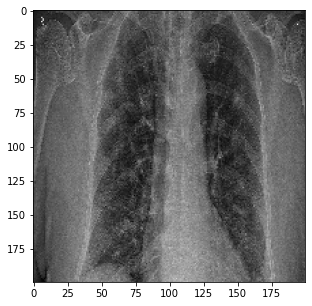

[[0.7507685  0.20026264 0.04896885]]
Covid


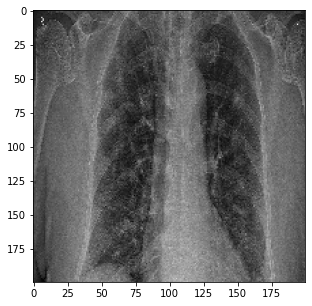

[[0.7507685  0.20026264 0.04896885]]
Covid


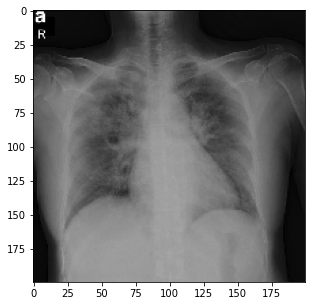

[[0.34153906 0.30414227 0.35431874]]
Covid


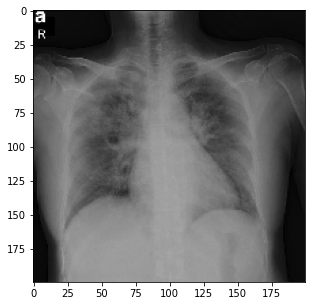

[[0.34153906 0.30414227 0.35431874]]
Covid


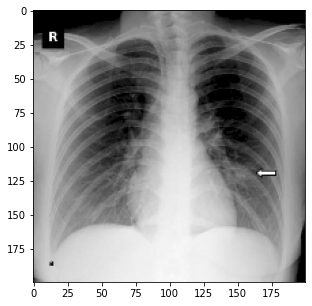

[[0.996316   0.00254668 0.00113738]]
Covid


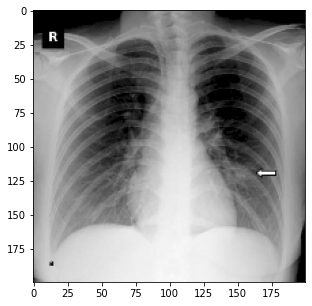

[[0.996316   0.00254668 0.00113738]]
Covid


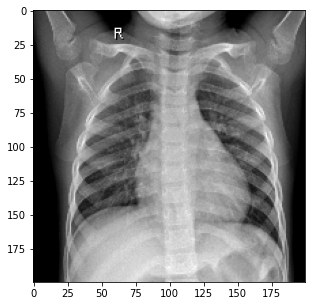

[[3.8325638e-04 9.9732250e-01 2.2941632e-03]]
Covid


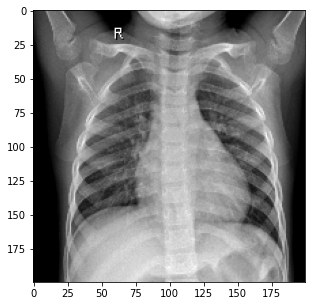

[[3.8325638e-04 9.9732250e-01 2.2941632e-03]]
Covid


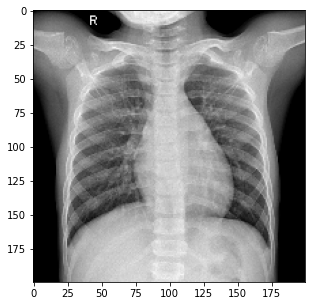

[[8.3930907e-05 9.9775237e-01 2.1636914e-03]]
Covid


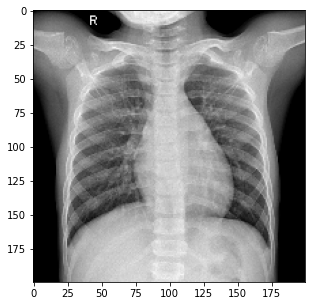

[[8.3930907e-05 9.9775237e-01 2.1636914e-03]]
Covid


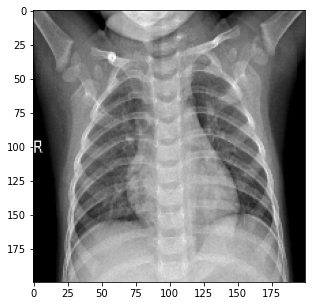

[[4.1334951e-04 9.9136084e-01 8.2257893e-03]]
Covid


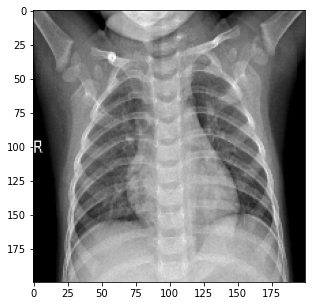

[[4.1334951e-04 9.9136084e-01 8.2257893e-03]]
Covid


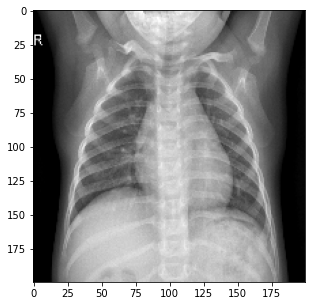

[[0.00628543 0.985436   0.00827851]]
Covid


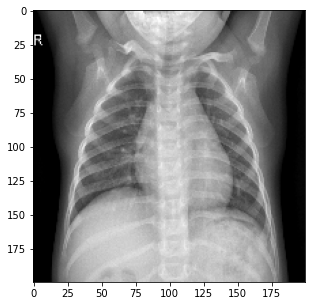

[[0.00628543 0.985436   0.00827851]]
Covid


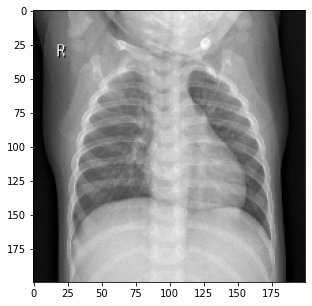

[[6.4299087e-04 9.9057895e-01 8.7781101e-03]]
Covid


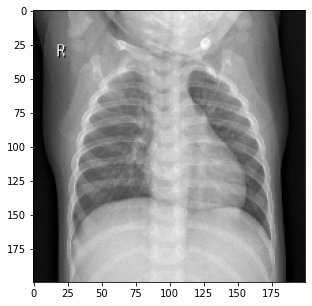

[[6.4299087e-04 9.9057895e-01 8.7781101e-03]]
Covid


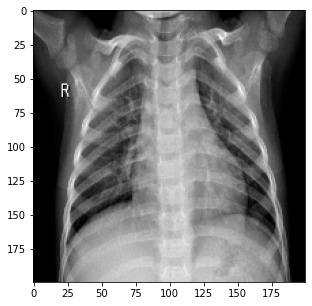

[[1.7639497e-04 9.8448437e-01 1.5339308e-02]]
Covid


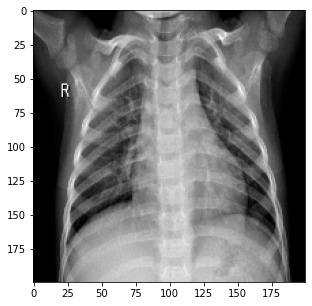

[[1.7639497e-04 9.8448437e-01 1.5339308e-02]]
Covid


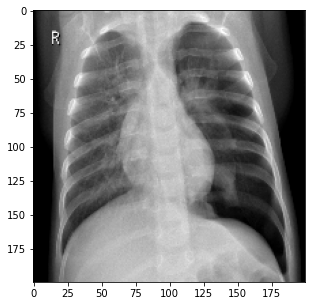

[[0.00357728 0.5883118  0.4081109 ]]
Covid


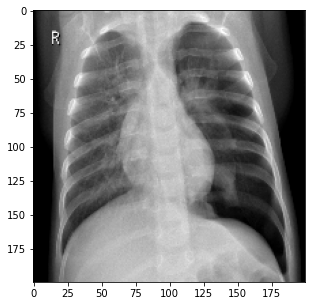

[[0.00357728 0.5883118  0.4081109 ]]
Covid


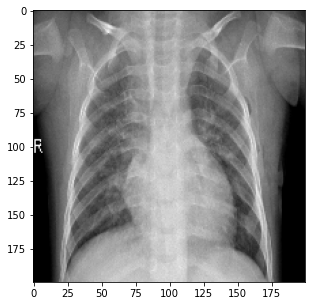

[[0.0011286 0.4663277 0.5325438]]
Covid


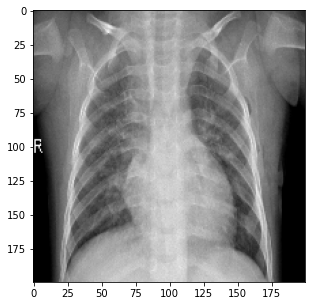

[[0.0011286 0.4663277 0.5325438]]
Covid


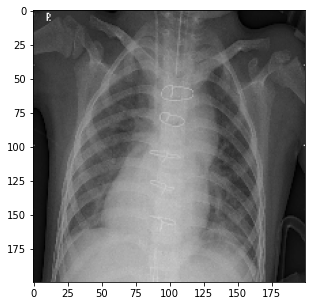

[[0.07627755 0.29414725 0.62957525]]
Covid


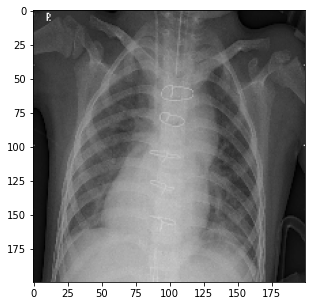

[[0.07627755 0.29414725 0.62957525]]
Covid


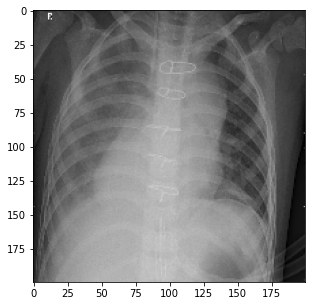

[[0.13372664 0.10503338 0.7612399 ]]
Covid


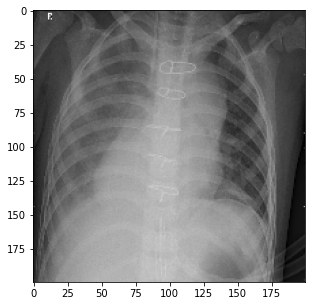

[[0.13372664 0.10503338 0.7612399 ]]
Covid


In [283]:
import skimage
from skimage.transform import resize
TEST_DIR ='C:/Users/20115/Desktop/newdataset/test/'
CATEGORIES = ["Covid", "normal","phenumina"]
model = tf.keras.models.load_model("choosen2.model")
X_test , y_test = get_data(TEST_DIR)
Pimages = os.listdir(TEST_DIR )
Nimages = os.listdir(TEST_DIR )
from matplotlib import pyplot as plt
IMG_SIZE = 200  # 50 in txt-based
def plotter(i):
    img_array = cv2.imread(TEST_DIR+ Pimages[i], cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    new_arr1=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
    plt.figure(figsize=(10,5))
    plt.imshow(new_array,cmap="gray")
    plt.show()
    return new_arr1

for i in range(1,14):
    prediction = model.predict([plotter(i)])
    print(prediction)  # will be a list in a list.
    print(CATEGORIES[int(prediction[0][0])])
    prediction = model.predict([plotter(i)])
    print(prediction)  # will be a list in a list.
    print(CATEGORIES[int(prediction[0][0])])

In [278]:
def get_data(Dir):
    X=[]
    y=[]
    for file in tqdm(os.listdir(Dir)):
        img = cv2.imread(Dir + '/' + file)
        if img is not None:
            img = skimage.transform.resize(img, (150, 150, 3))
            #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
            img = np.asarray(img)
            X.append(img)
            y.append(label)

    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

[]
[[0.4156894  0.1854013  0.39890927]
 [0.34426394 0.21692847 0.43880755]
 [0.6453152  0.06833425 0.28635055]
 ...
 [0.35395855 0.18158723 0.46445423]
 [0.582514   0.15466781 0.26281822]
 [0.4898643  0.09527306 0.41486272]]


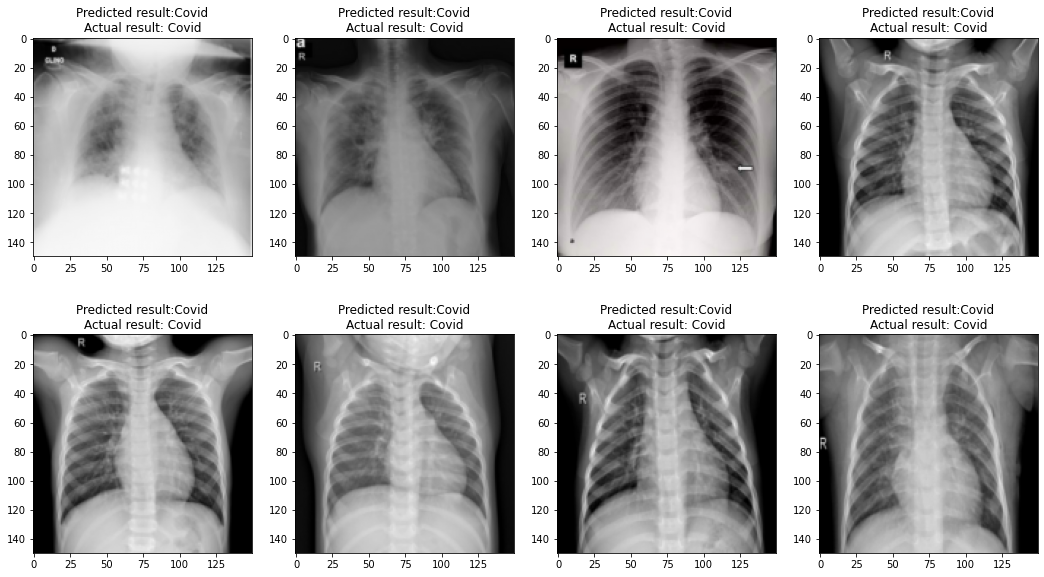

In [284]:
i=0
prop_class=[]
mis_class=[]
print(predictions)
print(Y_pred_tta)
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==np.argmax(Y_pred_tta[i])):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==np.argmax(Y_pred_tta[i])):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

# # Display first 8 images of benign
w=60
h=40
fig=plt.figure(figsize=(18, 10))
columns = 4
rows = 2
X_test=X_test.squeeze()
def Transfername(namecode):
    if namecode==0:
        return "Covid"
    elif namecode==1:
        return "normal"
    else: 
        return "phenomina"
    
for i in range(len(prop_class)):
    ax = fig.add_subplot(rows, columns, i+1)
    ax.set_title("Predicted result:"+ Transfername(np.argmax(Y_pred_tta[prop_class[i]]))
                       +"\n"+"Actual result: "+ Transfername(np.argmax(y_test[prop_class[i]])))
    plt.imshow(X_test[prop_class[i]], cmap='gray')
plt.show()

1


ValueError: Error when checking input: expected conv2d_345_input to have 4 dimensions, but got array with shape (200, 200)

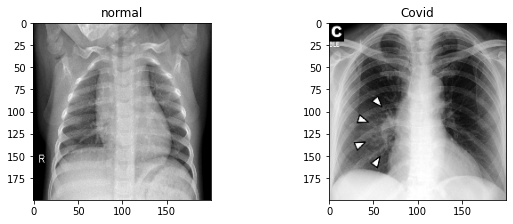

In [153]:
# # Display first 15 images of moles, and how they are classified
w=15
h=15
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
X=X.squeeze()
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(columns, rows, i)
    if y[i] == 0:
        ax.title.set_text('Covid')
        plt.imshow(X[i], cmap="gray")
        prediction1 = model.predict(X[i])
        test1 =CATEGORIES[int(prediction1[0][0])]
        print(y[i])
        print(CATEGORIES[int(prediction1[0][0])])
    elif y[i] == 1 :
        ax.title.set_text('normal')
        plt.imshow(X[i], cmap="gray")
        print(y[i])
    else :
        ax.title.set_text('phenomina')
        plt.imshow(X[i], cmap="gray")
        print(y[i])
    
plt.show()


In [236]:
def get_data(Dir):

    for file in tqdm(os.listdir(Dir)):
            img = cv2.imread(Dir + '/' + file)
            new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img=new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)/255.0
    return np.asarray(img)


In [237]:
import skimage
from skimage.transform import resize
TEST_DIR ="C:/Users/20115/Desktop/newdataset/test/"
X_test = get_data(TEST_DIR)

100%|██████████| 14/14 [00:00<00:00, 44.88it/s]


In [244]:
X_test1 = []
y_test = []

for features,label in training_data:
    X_test1.append(features)
    y_test.append(label)



X_test1 = np.array(X_test1).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test=np.array(y_test)

print(X_test1[1])

[[[31]
  [37]
  [41]
  ...
  [60]
  [53]
  [50]]

 [[33]
  [32]
  [40]
  ...
  [55]
  [54]
  [42]]

 [[33]
  [31]
  [41]
  ...
  [58]
  [50]
  [47]]

 ...

 [[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 0]
  [ 0]]

 [[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 0]
  [ 0]]

 [[ 0]
  [ 0]
  [ 0]
  ...
  [ 0]
  [ 0]
  [ 0]]]
